<a href="https://colab.research.google.com/github/VimalChamyal/Medical-insurance-cost-prediction/blob/main/Medical_Insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Medical Insurance cost prediction project

A medical insurance cost needs to be calculated for the approaching person
1. Collect data
2. Data Analysis
3. Data preprocessing
4. Test Train split
5. Feed training data to our ML model (Linear regression model in this case), to get a trained model
6. The model will then predict insurance cost

###Importing the dependencies

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

###Data collection & analysis

In [27]:
# Loading the data from csv file to pandas dataframe

url = 'https://raw.githubusercontent.com/VimalChamyal/Medical-insurance-cost-prediction/main/insurance.csv'
df = pd.read_csv(url)
df.head()

# Will show the first 5 records from the loaded data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
# Size of the dataset

df.shape

(1338, 7)

In [29]:
# Getting the most imp. information about the ds

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


###Categorical features
1. Sex
2. Smoker
3. Region
4. Children

In [30]:
# Checking missing values in each column

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###Data Analysis

In [31]:
# Statistical measures of the dataset

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

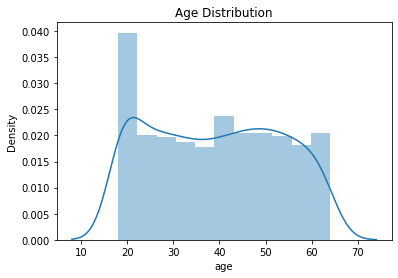

In [32]:
# Distribution of age

sns.distplot(df['age'])
plt.title('Age Distribution')

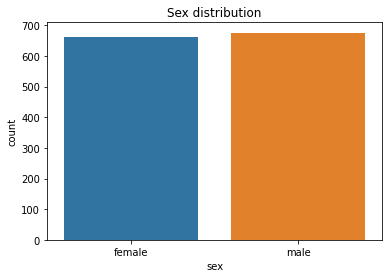

In [33]:
sns.countplot(x='sex', data=df)
plt.title('Sex distribution')
plt.show()

In [34]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

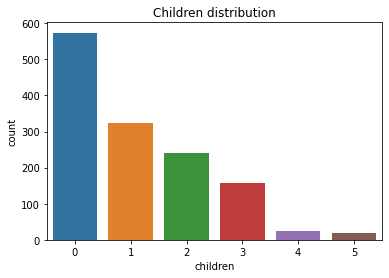

In [35]:
sns.countplot(x='children', data=df)
plt.title('Children distribution')
plt.show()

In [36]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

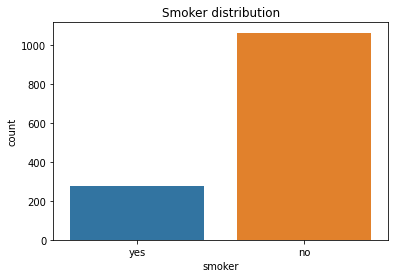

In [37]:
sns.countplot(x='smoker', data=df)
plt.title('Smoker distribution')
plt.show()

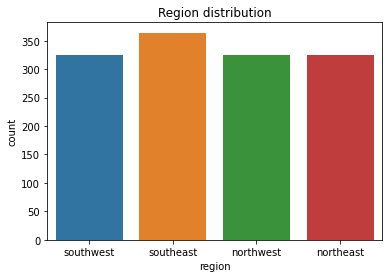

In [38]:
sns.countplot(x='region', data=df)
plt.title('Region distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI Distribution')

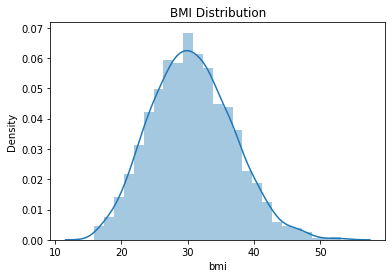

In [39]:
# Distribution of bmi

sns.distplot(df['bmi'])
plt.title('BMI Distribution')

# Normal BMI - 18.5 - 24.9

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


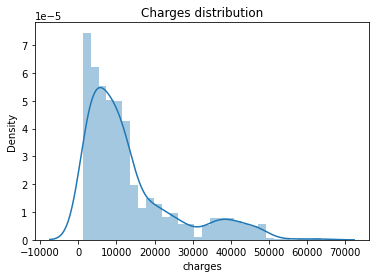

In [41]:
sns.distplot(df['charges'])
plt.title('Charges distribution')
plt.show()

###Data Pre-Processing
1. Data Encoding (Categorical data will be changed to numerical values)

In [46]:
# Encoding the categorical columns
# Encoding the sex column
df.replace({'sex' : {'male' : 0 , 'female' : 1}}, inplace = True)

# Encoding the smoker column
df.replace({'smoker' : {'yes' : 1, 'no' : 0}}, inplace = True)

# Encoding the region column
df.replace({'region' : {'southeast' : 0, 'southwest' : 1, 'northeast' : 2, 'northwest' : 3}}, inplace = True)

###Splitting the Features and Target variables

In [48]:
X = df.drop(columns = 'charges', axis = 1)
Y = df['charges']

In [49]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [51]:
print(Y)

# This is what we'll predict

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


###Splitting the data into training and testing data

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 2)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training
We will use Linear Regression here

In [54]:
# Loading the linear regression model

regressor = LinearRegression()

In [55]:
regressor.fit(X_train, Y_train)

LinearRegression()

###Model evaluation

In [56]:
# Prediction on training data

training_data_prediction = regressor.predict(X_train)

In [59]:
# R squared values

r2_train = metrics.r2_score(Y_train, training_data_prediction)
print(f'R squared value: {r2_train}')

R squared value: 0.751505643411174


In [61]:
# Prediction on test data

test_data_prediction = regressor.predict(X_test)

In [62]:
# R squared values

r2_test = metrics.r2_score(Y_test, test_data_prediction)
print(f'R squared value: {r2_test}')

R squared value: 0.7447273869684077


Building a predictive system

In [67]:
input_data = (52,1,30.78,1,0,2)

# Changing the input data to a numpy array
input_data_to_numpy_array = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_to_numpy_array.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)

print(prediction)

print(f'The insurance cost is: {prediction[0]}')

[11710.76508787]
The insurance cost is: 11710.76508787099


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
